In [56]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [57]:
# Load .env enviroment variables
load_dotenv()

True

In [12]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [64]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [65]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC = requests.get(btc_url).json()
BTC_price=BTC["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
ETH = requests.get(eth_url).json()
ETH_price=ETH["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc*BTC_price

my_eth_value = my_eth*ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $62157.26
The current value of your 5.3 ETH is $20444.80


In [66]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [67]:
# Set Alpaca API key and secret
alpaca_api_key = 'PKPMD0AFC95ON92G5M41'
alpaca_secret_key = 'oQbYO4emMuQNX0gBKNBw12OZEvSu2YLBd45wUOD1'


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [68]:
# Format current date as ISO format
# YOUR CODE HERE!
date = pd.Timestamp("2020-05-01",tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = date,
    limit=1000
).df

# Preview DataFrame
# YOUR CODE HERE!
closing_prices.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  222309009  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66  140118601  
2020-05-05 00:00:00-04:00  286.64  289.2500  283.7134  286.22  144288798  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.8700  284.29  130709942  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70  137510572

In [69]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(closing_prices["AGG"]["close"][0])
spy_close_price = float(closing_prices["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [70]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


In [71]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
df_savings = [my_btc_value+my_eth_value, my_agg_value+my_spy_value]

# Create savings DataFrame
# YOUR CODE HERE!

savings = pd.DataFrame(df_savings,columns=["amount"],index=["crypto","squares"])

# Display savings DataFrame
display(savings)

,amount
crypto,82602.053847
squares,37516.500000


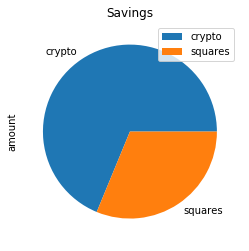

In [72]:
# Plot savings pie chart
# YOUR CODE HERE!

savings.plot.pie(y="amount",title="Savings")

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(savings.sum())

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund: 
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else: 
    print(emergency_fund - total_savings)

Congratulations! You have enough money in your emergency fund.


In [74]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-04', tz='America/New_York').isoformat()

In [75]:
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = date,
    limit=1000
).df

df_stock_data.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500, 
    num_trading_days = 252 * 30
)    

In [79]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_yr.portfolio_data.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-05-01 00:00:00-04:00          NaN  285.31  290.6572  281.52  282.73   
2020-05-04 00:00:00-04:00     0.000642  280.74  283.9000  279.13  283.66   
2020-05-05 00:00:00-04:00    -0.000812  286.64  289.2500  285.75  286.22   
2020-05-06 00:00:00-04:00    -0.003679  288.04  288.4600  283.78  284.29   
2020-05-07 00:00:00-04:00     0.002404  287.75  289.7800  287.13  287.70   

                                                   
                              volume daily_return  
time                                               
2020-05-01 00:00:00-04:00  111321036          NaN  
2020-05-04 00:00:00-04:00   70199660     0.003289  
2020-05-05 00:00:00-04:00   72232658     0.009025  
2020-05-06 00:00:00-04:00   65371977    -0.006743  
2020-05-07 00:00:00-04:00   68883538     0.011995

In [80]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bobdi\Desktop\Class Work\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003250,0.985604,1.005872,1.003794,0.995155,0.999098,1.002746,1.009669,0.993896,1.007669,...,1.003493,0.990917,0.999960,1.001125,1.010976,1.004093,0.998095,1.007728,0.999509,1.005886
2,0.997594,0.981703,1.009308,1.004002,0.987813,1.000029,1.004784,1.000884,0.992124,1.007190,...,1.005401,0.995067,1.006841,1.001930,1.008188,1.003488,1.010728,1.003904,1.001208,1.009445
3,0.997775,0.982943,1.014212,1.008727,0.997718,0.989703,1.009030,1.001722,0.991054,1.006917,...,1.006465,1.002300,1.014764,0.997891,1.010199,1.017630,1.002175,1.007208,1.002969,1.012300
4,1.007165,0.976953,1.010575,1.008629,0.990163,0.982570,1.003289,0.996666,1.002009,1.008223,...,1.009028,1.007740,1.016622,1.002400,1.013628,1.017229,1.008165,1.015087,0.994064,1.018191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,208.622317,96.998757,189.836746,391.809246,85.820537,165.421131,218.271621,377.302939,111.329970,78.408115,...,208.452243,246.169477,139.690900,202.334572,199.882396,124.083642,154.066128,299.825286,77.017492,267.010784
7557,206.811811,97.732579,190.608660,392.129390,86.422246,164.595749,219.027860,379.644204,112.257476,78.909171,...,208.787374,243.654386,139.641523,202.145587,202.537202,122.724526,154.258823,300.142256,77.592994,267.112729
7558,206.469704,96.917460,190.769564,393.373831,85.675173,165.242408,218.490628,379.605494,112.521644,79.324666,...,208.072368,242.908846,139.872013,201.067755,204.127910,123.040322,155.715983,298.236831,77.626276,267.543809
7559,204.999883,96.985490,190.637305,391.986050,85.147689,166.286804,221.086360,380.148319,112.869162,79.566768,...,210.169200,244.959002,139.614749,201.591255,203.407250,123.136729,155.877522,297.656143,77.221027,267.468510


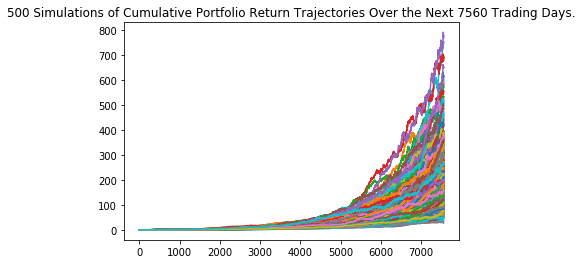

In [83]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_yr.plot_simulation()

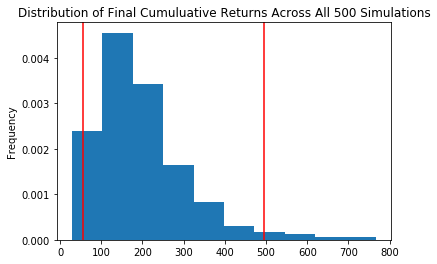

In [84]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_yr.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean            197.216102
std             113.187858
min              28.513018
25%             119.375882
50%             172.782390
75%             244.149061
max             767.229998
95% CI Lower     55.332012
95% CI Upper    496.204292
Name: 7560, dtype: float64


In [86]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1106640.25 and $9924085.83


In [88]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1659960.37 and $14886128.75


In [90]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500, 
    num_trading_days = 252 * 5
)  

In [91]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bobdi\Desktop\Class Work\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997856,1.003708,1.004761,1.003108,1.005587,1.007776,0.995371,1.001513,0.999385,1.002003,...,0.991131,0.994813,1.002629,0.999413,1.001096,1.000812,0.993479,0.999183,0.998488,1.002270
2,1.007021,1.008537,1.004606,1.005903,0.994566,1.016317,0.997793,0.998648,1.002820,0.999150,...,0.999336,0.988834,1.000392,1.001353,1.002915,0.999281,1.000401,0.996629,1.001059,0.995872
3,1.013539,1.016985,1.009053,1.011728,0.984943,1.027631,0.991046,1.011871,1.003193,0.996496,...,0.997024,0.993350,1.006558,1.000104,0.994124,0.991790,1.004606,0.983615,1.003893,1.004982
4,1.018139,1.013474,1.013755,1.013086,0.982254,1.029576,0.987543,1.011990,1.012899,0.994353,...,1.006716,0.989040,1.008743,1.004959,0.987049,0.999832,1.006290,0.978204,1.005169,1.001503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.062701,2.419880,2.296705,2.243542,2.368720,3.499827,2.113973,2.795136,2.618509,2.819140,...,2.963929,2.514327,2.544975,2.813051,2.846836,1.633905,1.979687,2.276183,2.712475,2.302760
1257,3.086770,2.419271,2.277156,2.235954,2.385696,3.524141,2.108501,2.807821,2.621950,2.813560,...,2.990859,2.518452,2.565257,2.833723,2.864027,1.643684,1.992622,2.294865,2.712868,2.295057
1258,3.080202,2.438856,2.280560,2.259837,2.397776,3.517999,2.118194,2.813638,2.608314,2.848890,...,2.996698,2.510486,2.573962,2.841013,2.871946,1.638623,1.987914,2.303859,2.696374,2.318625
1259,3.077675,2.432896,2.303968,2.236901,2.393253,3.524882,2.113597,2.831772,2.614610,2.855055,...,2.959848,2.518991,2.571517,2.823625,2.886345,1.651457,1.976583,2.311978,2.703205,2.291746


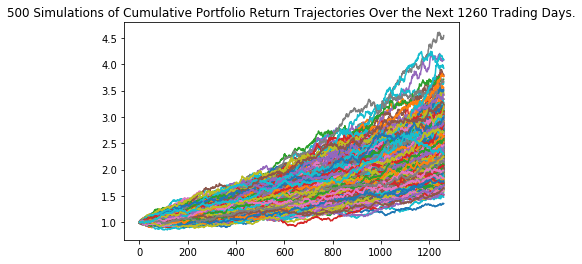

In [94]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_yr.plot_simulation()

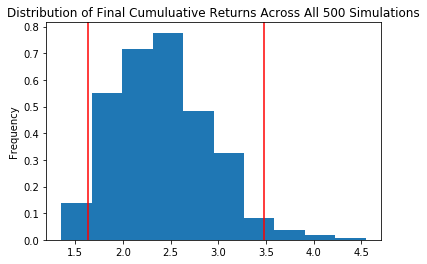

In [95]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_yr.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_five_yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              2.413699
std               0.501657
min               1.354628
25%               2.030217
50%               2.364749
75%               2.718945
max               4.545895
95% CI Lower      1.633137
95% CI Upper      3.483219
Name: 1260, dtype: float64


In [97]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8] * initial_investment,2)
ci_upper_five = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $97988.24 and $208993.14


In [98]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500, 
    num_trading_days = 252 * 10
)  

In [99]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bobdi\Desktop\Class Work\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991398,1.008169,1.004178,0.999228,0.998780,1.004249,1.002225,1.008128,0.989703,1.007160,...,1.004564,1.006124,0.997924,1.011201,1.002941,1.005817,1.007681,0.999242,0.996758,0.999191
2,0.986884,1.006133,1.013514,0.993525,1.016119,1.007972,1.010225,1.003834,0.995837,1.007536,...,1.011914,1.012010,1.000768,1.007753,0.999750,0.995066,1.001140,1.003043,0.997405,0.996948
3,0.985087,1.004692,1.020925,0.998646,1.015546,1.007765,1.009010,1.005622,0.995186,0.998793,...,1.006493,1.008452,0.998964,1.006906,0.992822,0.989819,1.001394,0.997823,1.001133,1.003485
4,0.987143,1.003132,1.025035,1.004040,1.018863,1.009084,1.013514,1.004189,0.986079,0.999801,...,1.009937,1.013894,0.994145,1.014219,1.001363,0.994302,0.990248,1.013172,0.995730,0.997767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.018507,4.375168,4.330387,7.585143,5.741962,5.932915,7.327405,9.592947,5.430813,3.309882,...,5.744442,2.321113,5.786070,6.822043,5.498245,4.981951,5.187568,7.704948,5.158891,4.637076
2517,6.052649,4.384373,4.296123,7.556907,5.754331,5.913104,7.276402,9.605657,5.419940,3.317345,...,5.812396,2.326106,5.793709,6.789955,5.475085,5.043709,5.200442,7.751481,5.161363,4.638425
2518,6.085545,4.448901,4.317504,7.587428,5.772096,5.901648,7.259387,9.578891,5.395735,3.284323,...,5.839350,2.319418,5.850334,6.778596,5.456193,5.010595,5.203321,7.789438,5.153822,4.646470
2519,6.026718,4.486035,4.345495,7.609271,5.842994,5.895570,7.329238,9.553854,5.463691,3.282475,...,5.877104,2.332350,5.899195,6.766801,5.501365,4.988175,5.158755,7.747931,5.148412,4.636904


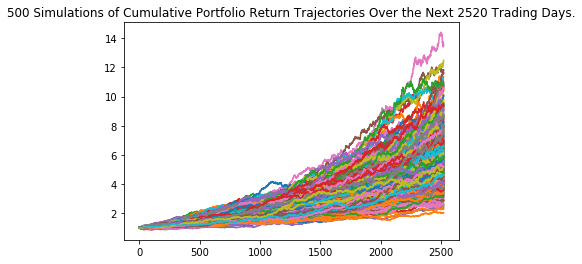

In [100]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_yr.plot_simulation()

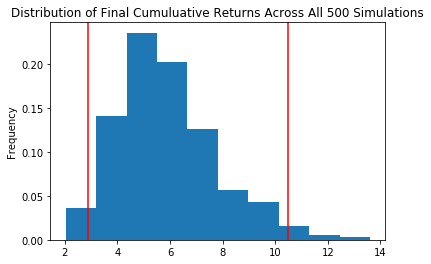

In [101]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_yr.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_ten_yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              5.871092
std               1.886689
min               2.037556
25%               4.531496
50%               5.617410
75%               6.932285
max              13.603060
95% CI Lower      2.878707
95% CI Upper     10.479262
Name: 2520, dtype: float64


In [103]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8] * initial_investment,2)
ci_upper_ten = round(tbl[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $172722.42 and $628755.74
